In [1]:
!pwd

/mnt/erda/deep_contact


In [2]:
import sys
from test_erda import mount_works
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path


In [4]:
from Box2D import b2ContactListener
from xml_convert import XMLExporter
from run_sim import run_simulation,RunSimParams

## Run a simulation, with these parameters

In [5]:
# Number of bodies in worlds
nBodies = 100
# Something about spread of bodies?
sigma_coef = 1.2
# Dimension of static box
xlow, xhi = 0, 15
ylow, yhi = 0, 15
p_ll = (xlow, ylow)
p_hr = (xhi, yhi)

# body radius min and max
radius = (0.5, 0.5)

# Timestep
timeStep = 1.0 / 100
# Iteration limits
velocityIterations = 1000
positionIterations = 250
# Iteration thresholds
velocityThreshold = 1e-4
positionThreshold = 1e-4

# Path to store data
# PATH = Path("test_gen_data")
PATH = Path("/tmp/test_gen_data")


In [6]:
from Box2D import b2World, b2Vec2
from gen_world import new_confined_clustered_circles_world
from sim_types import SimData

seed = 0
sim_name='test'
# Create world
world = b2World()
world.userData = SimData(
    name=sim_name,
    d_t=timeStep,
    vel_iter=velocityIterations,
    pos_iter=positionIterations,
    vel_thres=velocityThreshold,
    pos_thres=positionThreshold
)

# Fill world with static box and circles
new_confined_clustered_circles_world(
    world,
    nBodies,
    b2Vec2(xlow, ylow),
    b2Vec2(xhi, yhi),
    radius,
    sigma_coef,
    seed
)

# Set iteration thresholds
world.velocityThreshold = velocityThreshold
world.positionThreshold = positionThreshold

sim_params = RunSimParams(
    steps = 250,
    velocityIterations = velocityIterations,
    positionIterations = positionIterations,
    timeStep = timeStep,
    p_ll = p_ll,
    p_hr = p_hr
)
    
run_simulation(world,sim_params,PATH,verbose=True, write_png=True)


Step:  0 ...
Saving to png ...  test_000001.png

Step:  1 ...
Saving to png ...  test_000002.png

Step:  2 ...
Saving to png ...  test_000003.png

Step:  3 ...
Saving to png ...  test_000004.png

Step:  4 ...
Saving to png ...  test_000005.png

Step:  5 ...
Saving to png ...  test_000006.png

Step:  6 ...
Saving to png ...  test_000007.png

Step:  7 ...
Saving to png ...  test_000008.png

Step:  8 ...
Saving to png ...  test_000009.png

Step:  9 ...
Saving to png ...  test_000010.png

Step:  10 ...
Saving to png ...  test_000011.png

Step:  11 ...
Saving to png ...  test_000012.png

Step:  12 ...
Saving to png ...  test_000013.png

Step:  13 ...
Saving to png ...  test_000014.png

Step:  14 ...
Saving to png ...  test_000015.png

Step:  15 ...
Saving to png ...  test_000016.png

Step:  16 ...
Saving to png ...  test_000017.png

Step:  17 ...
Saving to png ...  test_000018.png

Step:  18 ...
Saving to png ...  test_000019.png

Step:  19 ...
Saving to png ...  test_000020.png

Step:  20


Step:  164 ...
Saving to png ...  test_000165.png

Step:  165 ...
Saving to png ...  test_000166.png

Step:  166 ...
Saving to png ...  test_000167.png

Step:  167 ...
Saving to png ...  test_000168.png

Step:  168 ...
Saving to png ...  test_000169.png

Step:  169 ...
Saving to png ...  test_000170.png

Step:  170 ...
Saving to png ...  test_000171.png

Step:  171 ...
Saving to png ...  test_000172.png

Step:  172 ...
Saving to png ...  test_000173.png

Step:  173 ...
Saving to png ...  test_000174.png

Step:  174 ...
Saving to png ...  test_000175.png

Step:  175 ...
Saving to png ...  test_000176.png

Step:  176 ...
Saving to png ...  test_000177.png

Step:  177 ...
Saving to png ...  test_000178.png

Step:  178 ...
Saving to png ...  test_000179.png

Step:  179 ...
Saving to png ...  test_000180.png

Step:  180 ...
Saving to png ...  test_000181.png

Step:  181 ...
Saving to png ...  test_000182.png

Step:  182 ...
Saving to png ...  test_000183.png

Step:  183 ...
Saving to png .

In [7]:
movie_frames = sorted(list(PATH.glob(f"{sim_name}_*.png")))

In [8]:
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import animation, rc
from IPython.display import HTML


fig, ax = plt.subplots()
ax.axis('off')

def animate(i):
    img = Image.open(movie_frames[i])
    ax.imshow(img)
    return [img]


anim = animation.FuncAnimation(fig, animate,
                               frames=len(movie_frames), interval=100, 
                               blit=False)
plt.close()

In [9]:
HTML(anim.to_jshtml())

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


## Check that we can extract runtime information from the simulation

In [10]:
# Create world
world = b2World()
world.userData = SimData(
    name='profile',
    d_t=timeStep,
    vel_iter=velocityIterations,
    pos_iter=positionIterations,
    vel_thres=velocityThreshold,
    pos_thres=positionThreshold
)

# Fill world with static box and circles
new_confined_clustered_circles_world(
    world,
    nBodies,
    b2Vec2(xlow, ylow),
    b2Vec2(xhi, yhi),
    radius,
    sigma_coef
)

# Set iteration thresholds
world.velocityThreshold = velocityThreshold
world.positionThreshold = positionThreshold


In [11]:
sim_params = RunSimParams(
    steps = 150,
    velocityIterations = velocityIterations,
    positionIterations = positionIterations,
    timeStep = timeStep,
    p_ll=p_ll,
    p_hr=p_hr
)


prof = run_simulation(world,sim_params,PATH,verbose=True,write_xml=False, write_png=False,
                      write_profile=True)


Step:  0 ...
Contacts: 0, vel_iter: 100, pos_iter: 100
Velocity:
Total   = 1
Average = 1.00
Median  = 1
Std     = 0.00
Position:
Total   = 1
Average = 1.00
Median  = 1
Std     = 0.00

Step:  1 ...
Contacts: 0, vel_iter: 100, pos_iter: 100
Velocity:
Total   = 2
Average = 1.00
Median  = 1
Std     = 0.00
Position:
Total   = 2
Average = 1.00
Median  = 1
Std     = 0.00

Step:  2 ...
Contacts: 0, vel_iter: 100, pos_iter: 100
Velocity:
Total   = 3
Average = 1.00
Median  = 1
Std     = 0.00
Position:
Total   = 3
Average = 1.00
Median  = 1
Std     = 0.00

Step:  3 ...
Contacts: 0, vel_iter: 100, pos_iter: 100
Velocity:
Total   = 4
Average = 1.00
Median  = 1
Std     = 0.00
Position:
Total   = 4
Average = 1.00
Median  = 1
Std     = 0.00

Step:  4 ...
Contacts: 0, vel_iter: 100, pos_iter: 100
Velocity:
Total   = 5
Average = 1.00
Median  = 1
Std     = 0.00
Position:
Total   = 5
Average = 1.00
Median  = 1
Std     = 0.00

Step:  5 ...
Contacts: 0, vel_iter: 100, pos_iter: 100
Velocity:
Total   = 6
Av

Contacts: 70, vel_iter: 641, pos_iter: 230
Velocity:
Total   = 4722
Average = 52.47
Median  = 16
Std     = 123.29
Position:
Total   = 2489
Average = 27.66
Median  = 11
Std     = 42.76

Step:  90 ...
Contacts: 79, vel_iter: 569, pos_iter: 149
Velocity:
Total   = 5174
Average = 56.86
Median  = 17
Std     = 129.49
Position:
Total   = 2587
Average = 28.43
Median  = 12
Std     = 43.16

Step:  91 ...
Contacts: 85, vel_iter: 593, pos_iter: 236
Velocity:
Total   = 5654
Average = 61.46
Median  = 18
Std     = 136.05
Position:
Total   = 2789
Average = 30.32
Median  = 12
Std     = 46.54

Step:  92 ...
Contacts: 90, vel_iter: 339, pos_iter: 200
Velocity:
Total   = 5958
Average = 64.06
Median  = 19
Std     = 137.61
Position:
Total   = 2938
Average = 31.59
Median  = 12
Std     = 47.88

Step:  93 ...
Contacts: 87, vel_iter: 352, pos_iter: 159
Velocity:
Total   = 6275
Average = 66.76
Median  = 20
Std     = 139.32
Position:
Total   = 3064
Average = 32.60
Median  = 12
Std     = 48.60

Step:  94 ...
Conta

Contacts: 134, vel_iter: 395, pos_iter: 24
Velocity:
Total   = 23614
Average = 169.88
Median  = 53
Std     = 220.15
Position:
Total   = 7826
Average = 56.30
Median  = 28
Std     = 65.04

Step:  139 ...
Contacts: 136, vel_iter: 596, pos_iter: 19
Velocity:
Total   = 24203
Average = 172.88
Median  = 53
Std     = 222.18
Position:
Total   = 7840
Average = 56.00
Median  = 27
Std     = 64.90

Step:  140 ...
Contacts: 135, vel_iter: 617, pos_iter: 16
Velocity:
Total   = 24813
Average = 175.98
Median  = 54
Std     = 224.41
Position:
Total   = 7851
Average = 55.68
Median  = 27
Std     = 64.78

Step:  141 ...
Contacts: 134, vel_iter: 436, pos_iter: 26
Velocity:
Total   = 25239
Average = 177.74
Median  = 55
Std     = 224.59
Position:
Total   = 7870
Average = 55.42
Median  = 27
Std     = 64.63

Step:  142 ...
Contacts: 138, vel_iter: 465, pos_iter: 10
Velocity:
Total   = 25698
Average = 179.71
Median  = 56
Std     = 225.03
Position:
Total   = 7875
Average = 55.07
Median  = 27
Std     = 64.54

Step:

### check if we can load the profiling data

In [12]:
profile_fil = sorted(list(PATH.glob(f"profile_*.npz")))[0]
print("Loading profile data from ", profile_fil, ' ...')
profile_data = np.load(profile_fil)['results'].tolist()

Loading profile data from  /tmp/test_gen_data/profile_000000-000149.npz  ...


In [13]:
profile_data.keys()

dict_keys(['totalStepTimes', 'contactsSolved', 'totalVelocityIterations', 'totalPositionIterations', 'velocityLambdaTwoNorms', 'velocityLambdaInfNorms', 'positionLambdas'])

### Let's run some simulations with different warmstarting methods

In [14]:
from warmstart_models import NoWarmStartModel, BuiltinWarmStartModel, BadModel, \
RandomModel, CopyWorldModel, IdentityGridModel

models = []
models.append((NoWarmStartModel(),'none'))
models.append((BuiltinWarmStartModel(),'builtin'))
models.append((BadModel(),'bad'))
# seed is None, fully random warmstarts
models.append((RandomModel(None),'random'))
# copy world with no rounding, 2 decimals and 0 decimals
models.append((CopyWorldModel(),'copy'))
models.append((CopyWorldModel(2),'copy2'))
models.append((CopyWorldModel(0),'copy0'))
models.append((IdentityGridModel(p_ll,p_hr,xRes=0.125,yRes=0.125,h=0.5),'grid'))

In [32]:
import random
num_worlds_per_model = 5
# seeds = random.sample(list(range(1,1000)),k=num_worlds_per_model)
seeds = range(num_worlds_per_model)
sim_params = RunSimParams(
    steps = 250,
    velocityIterations = velocityIterations,
    positionIterations = positionIterations,
    timeStep = timeStep,
    p_hr=p_hr,
    p_ll=p_ll
)

for (m,n) in models:
    print("Running simulations for model ",n," ...")
    for i in range(num_worlds_per_model):
        print("World ",i+1," out of ",num_worlds_per_model," ...")
        # Create world
        world = b2World()
        world.userData = SimData(
            name=f"{n}_{i}",
            d_t=timeStep,
            vel_iter=velocityIterations,
            pos_iter=positionIterations,
            vel_thres=velocityThreshold,
            pos_thres=positionThreshold
        )

        # Fill world with static box and circles
        new_confined_clustered_circles_world(
            world,
            nBodies,
            b2Vec2(xlow, ylow),
            b2Vec2(xhi, yhi),
            radius,
            sigma_coef,
            seed=i
        ) # setting the seed makes sure we are solving the *SAME* simulation with every model

        # Set iteration thresholds
        world.velocityThreshold = velocityThreshold
        world.positionThreshold = positionThreshold
        run_simulation(world,sim_params,PATH,verbose=False,write_xml=False, write_png=False, write_profile=True,model=m)

Running simulations for model  grid  ...
World  1  out of  5  ...
World  2  out of  5  ...
World  3  out of  5  ...
World  4  out of  5  ...
World  5  out of  5  ...


In [29]:
import shutil
unet_fils = list(Path("test_gen_data").glob("UNet*.npz"))
for fil in unet_fils:
    shutil.copy(str(fil),PATH/fil.name)
# models+=[(None,'UNet')]
list(PATH.glob("UNet*.npz"))


[PosixPath('/tmp/test_gen_data/UNet_0_000000-000249.npz'),
 PosixPath('/tmp/test_gen_data/UNet_1_000000-000249.npz'),
 PosixPath('/tmp/test_gen_data/UNet_2_000000-000249.npz'),
 PosixPath('/tmp/test_gen_data/UNet_3_000000-000249.npz'),
 PosixPath('/tmp/test_gen_data/UNet_4_000000-000249.npz')]

Load all this data in a structured way

In [1]:
# models = models+[(None,'UNet')]
profile_data = {}
# for (_,n) in models:
for (_,n) in models+[(None,'UNet')]:
    profile_fils = sorted(list(PATH.glob(f"{n}_*.npz")))
    profile_data[n]=[]
    for f in profile_fils:
        print("Loading profile data from ", f, ' ...')
        profile_data[n].append(np.load(f)['results'].tolist())
profile_data.keys(), len(profile_data['none'])

NameError: name 'models' is not defined

In [31]:
# this should now include normalPairs and tangentPairs
profile_data['copy'][0].keys()

dict_keys(['totalStepTimes', 'contactsSolved', 'totalVelocityIterations', 'totalPositionIterations', 'velocityLambdaTwoNorms', 'velocityLambdaInfNorms', 'positionLambdas', 'normalPairs', 'tangentPairs'])

### Let's plot this data, see how it looks like

First, we'll process the data

In [63]:
from warmstart_plot import preprocess_profiles, show_iterations_plot, show_velocity_convergence,\
show_position_convergence, show_lambda_errors

In [64]:
to_plot={}
for m in profile_data.keys():
    to_plot[m] = preprocess_profiles(profile_data[m],velocityIterations,positionIterations)

#are they any different?
all(to_plot['copy']["velocityIteratorInfCounts"] == to_plot['copy']["velocityIteratorTwoCounts"])

False

In [65]:
[n for m,n in models]

['none', 'builtin', 'bad', 'random', 'copy', 'copy2', 'copy0', 'grid']

In [66]:
from warmstart_plot import smooth
colors = {'none':'cyan','grid':'orange',
          'bad':'magenta','UNet':'green',
          'copy0':'blue','builtin':'red',
          'copy':'black','copy2':'indigo','random':'brown'}
# colors = colors[0:len(list(to_plot.values()))]


In [2]:
# Iteration plots Smoothing factor - set to 1 to turn off smoothing
show_iterations_plot(to_plot,colors,smoothingFactor=7)

NameError: name 'show_iterations_plot' is not defined

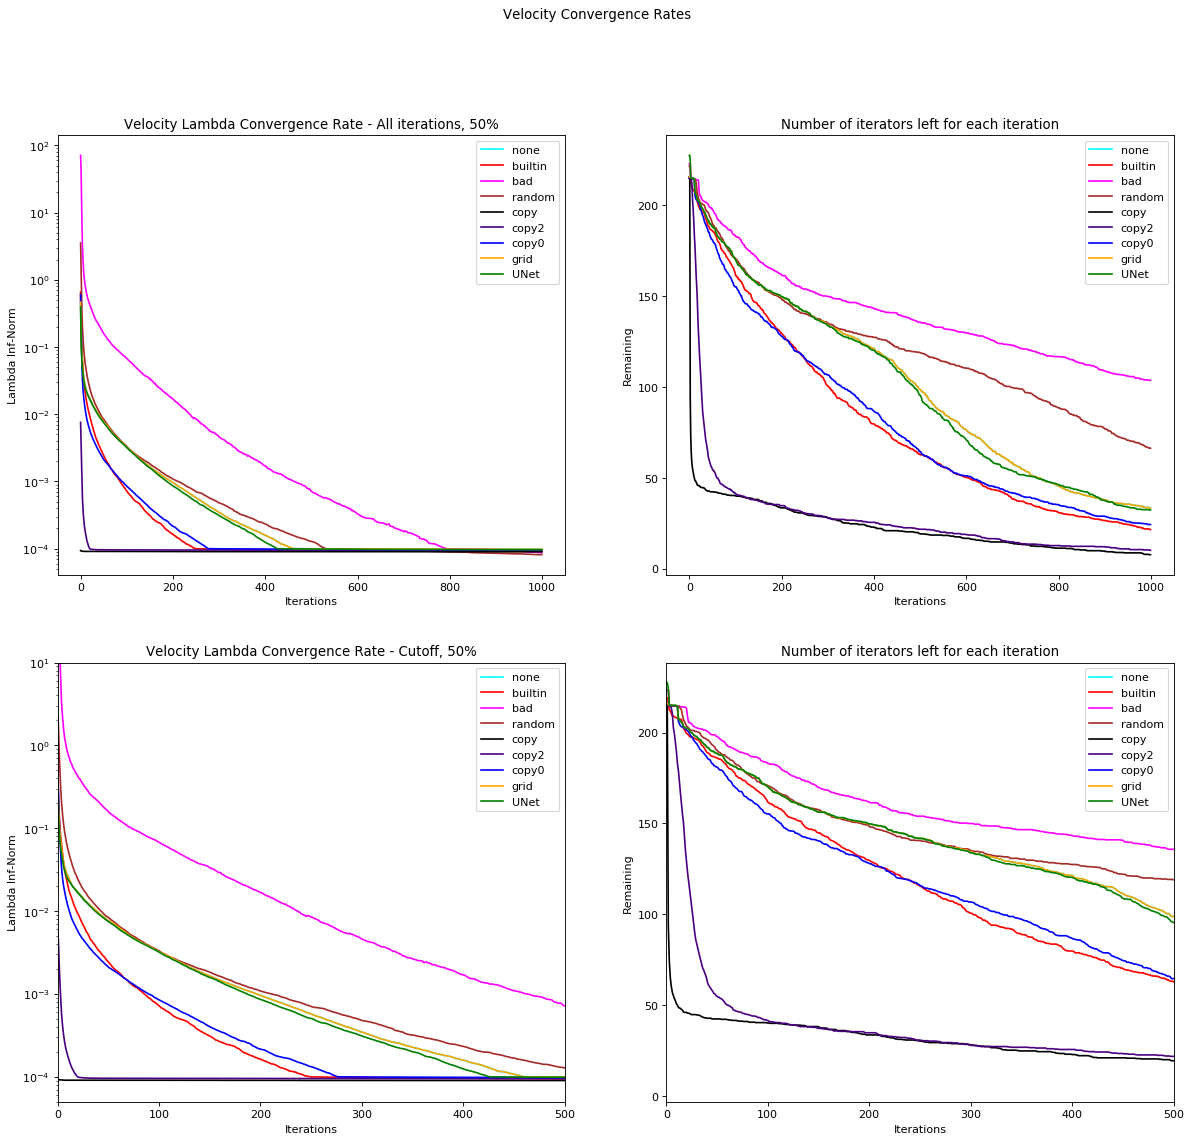

In [68]:
show_velocity_convergence(to_plot,colors, velocityThreshold)

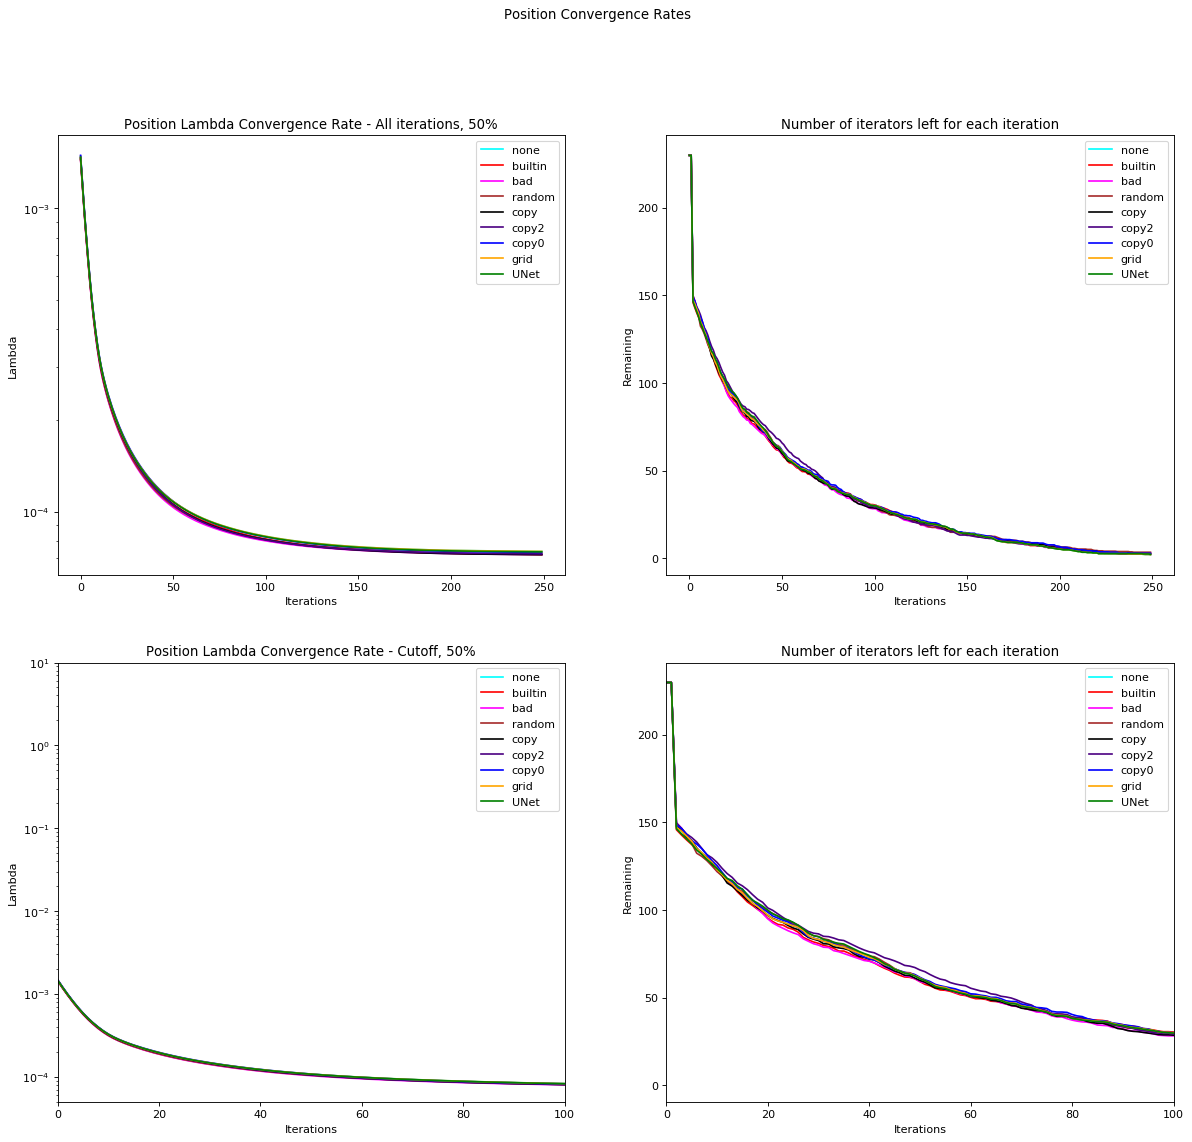

In [69]:
show_position_convergence(to_plot,colors,positionThreshold)

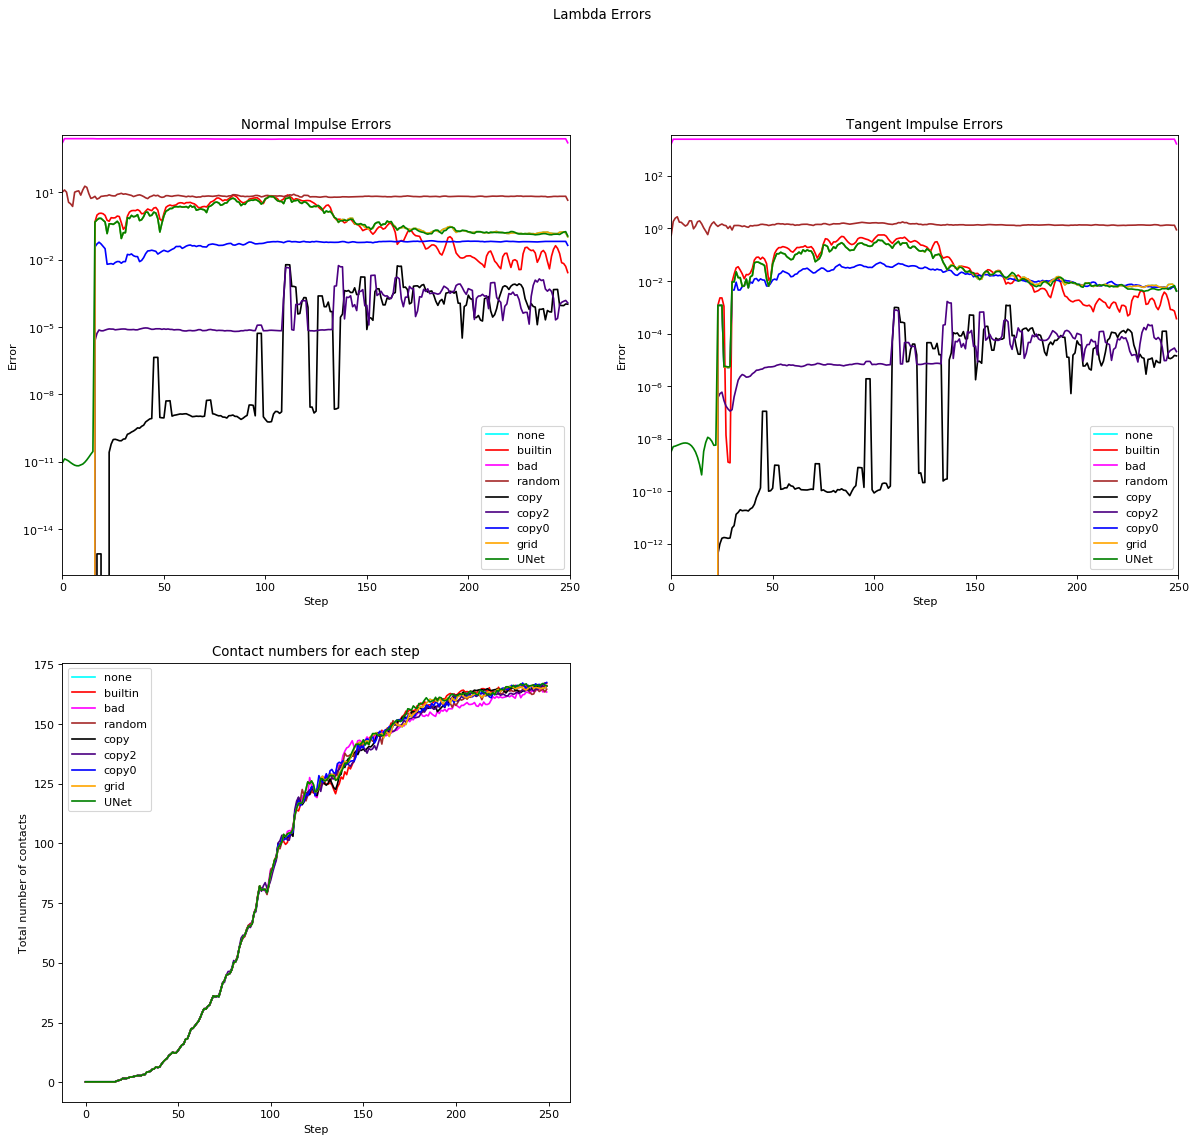

In [70]:
show_lambda_errors(to_plot,colors,errorSmoothingFactor=3)

All these plotting and preprocess methods moved to warmstart_plot.py